In [29]:
import numpy as np
import cv2 as cv
import os
import tqdm

# collecting data from files

In [2]:
data_path='train'
classes=['Jennie','Jisoo','Lisa','Rose','Others']

In [3]:
face_cascade=cv.CascadeClassifier('haarcascade_frontalface_default.xml')

In [4]:
import matplotlib.pyplot as plt

In [32]:
def get_cropped(img_path):
    img=cv.imread(img_path)
    
#     now read the face
    try:
        gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
        img_list=[]
        faces=face_cascade.detectMultiScale(gray)
        for x,y,h,_ in faces:
            roi_img=img[y:y+h,x:x+h]
            img_list.append(roi_img)
#         plt.imshow(roi_img)
        
        return img_list,True
    except:
        return False,False
        
        
    

In [6]:
cropped_dir='cropped'

In [29]:
for label in classes:
    print(f'\t\t\t\t{label}')
    count=0
    for img in os.listdir(os.path.join(data_path,label)):
        img_path=os.path.join(data_path,label,img)
        print(img_path)
        image_list,ret=get_cropped(img_path)
        try:
            if ret:
                for image in image_list:
                    cv.imwrite(f'{cropped_dir}\\{label}\\{count}.jpg',image)
                    count+=1
            else:
                continue
        except:
            continue
        

				Jennie
train\Jennie\adviddsssi.jpg
train\Jennie\auwesomuqo.jpg
train\Jennie\bdgottjqom.jpg
train\Jennie\bfvatdjwuz.jpg
train\Jennie\bpisifndyd.jpg
train\Jennie\buqamssnre.jpg
train\Jennie\bvkpxasnbb.jpg
train\Jennie\cfrjdllmkt.jpg
train\Jennie\cpduhvvupu.jpg
train\Jennie\cpfmhluclz.jpg
train\Jennie\dhrphmhdyn.jpg
train\Jennie\dluvllnumj.jpg
train\Jennie\dohobzgdne.jpg
train\Jennie\draxvkczvl.jpg
train\Jennie\eaodfcfeiq.jpg
train\Jennie\eqonrueglo.jpg
train\Jennie\eqsuokbkvv.jpg
train\Jennie\ewyfzfrdnx.jpg
train\Jennie\fbtoaekzfu.jpg
train\Jennie\ffzjvvkezc.jpg
train\Jennie\fhpydnvxqh.jpg
train\Jennie\fqhdkqnvio.jpg
train\Jennie\fxktwojmrq.jpg
train\Jennie\ghyyhyqgvl.jpg
train\Jennie\gwsjbiyjqm.jpg
train\Jennie\hbaqocxqvm.jpg
train\Jennie\hebpraicvv.jpg
train\Jennie\hkehjwpwra.jpg
train\Jennie\hndjlpaico.jpg
train\Jennie\hrpqzrvkad.jpg
train\Jennie\hrxpxcmgsd.jpg
train\Jennie\iervehdfwg.jpg
train\Jennie\igjhukpfwn.jpg
train\Jennie\ijtomucqnz.jpg
train\Jennie\imfpwfzonm.jpg
train\Jen

train\Lisa\rfmfyvxktn.jpg
train\Lisa\rhvjgvwwrb.jpg
train\Lisa\rjkylibyrc.jpg
train\Lisa\rqjzgyimab.jpg
train\Lisa\rqzcitudee.jpg
train\Lisa\saezqgedwf.jpg
train\Lisa\scmmgatafr.jpg
train\Lisa\spjuarrgnb.jpg
train\Lisa\sqexlcpfos.jpg
train\Lisa\srjoptxisi.jpg
train\Lisa\szbogsjblv.jpg
train\Lisa\tazsktpnbr.jpg
train\Lisa\tnvhsiwukj.jpg
train\Lisa\ttlrawwhcp.jpg
train\Lisa\txdfkqvhjl.jpg
train\Lisa\ufterzhphb.jpg
train\Lisa\ukdsbpmagd.jpg
train\Lisa\unmoqtzbsz.jpg
train\Lisa\utfuhiwlkq.jpg
train\Lisa\vdsrsezvsd.jpg
train\Lisa\vfocqaqexz.jpg
train\Lisa\vfrtkukxog.jpg
train\Lisa\vlflbljnbr.jpg
train\Lisa\vlswcglnei.jpg
train\Lisa\vnqimmhvin.jpg
train\Lisa\vobsfnripl.jpg
train\Lisa\vothktqbbb.jpg
train\Lisa\vqfiwrlcec.jpg
train\Lisa\vqyxdabtbd.jpg
train\Lisa\vrdkrwyxeh.jpg
train\Lisa\vxgfsarwhb.jpg
train\Lisa\wmazojgjzk.jpg
train\Lisa\wrgrpkcydy.jpg
train\Lisa\wynxdaflri.jpg
train\Lisa\xbswaehlgk.jpg
train\Lisa\xhqxsymckm.jpg
train\Lisa\xsxdxmpbwz.jpg
train\Lisa\yaxlvoquez.jpg
train\Lisa\y

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:

#instantiate the ImageDataGenerator class
datagen = ImageDataGenerator(
        rotation_range=40,
        vertical_flip=True,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',)
#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('tobeaugment/', batch_size=6,target_size=(256,256),
                          save_to_dir='augment/', save_format='jpg'):
    pass

Found 117 images belonging to 1 classes.


KeyboardInterrupt: 

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
x=[]
y=[]
for label in classes:
    print(f'\t\t\t\t{label}')
    index=classes.index(label)
    print('\t\t\t\t',index)
    for img in os.listdir(os.path.join(cropped_dir,label)):
        img_path=os.path.join(cropped_dir,label,img)
        image=cv.imread(img_path)
        image=cv.resize(image,(128,128))
        x.append(image)
        y.append(index)

				Jennie
				 0
				Jisoo
				 1
				Lisa
				 2
				Rose
				 3
				Others
				 4


In [10]:
x=np.array(x)/255
y=np.array(y)

In [11]:
import pickle
pickle.dump(x,open('xdata.pickle','wb'))
pickle.dump(y,open('ydata.pickle','wb'))

In [12]:
from sklearn.model_selection import train_test_split

In [20]:
_,x_test,_,y_test=train_test_split(x,y,test_size=0.25)

In [14]:
# create model

In [22]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(120,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(60,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(45,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(5,activation='softmax'))

In [23]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
52/52 [==============================] - 111s 2s/step - loss: 1.6023 - accuracy: 0.2479 - val_loss: 1.5090 - val_accuracy: 0.3451
Epoch 2/5
52/52 [==============================] - 94s 2s/step - loss: 1.4534 - accuracy: 0.3816 - val_loss: 1.3804 - val_accuracy: 0.4066
Epoch 3/5
52/52 [==============================] - 93s 2s/step - loss: 1.3419 - accuracy: 0.4371 - val_loss: 1.2578 - val_accuracy: 0.4835
Epoch 4/5
52/52 [==============================] - 93s 2s/step - loss: 1.2452 - accuracy: 0.4902 - val_loss: 1.1785 - val_accuracy: 0.5165
Epoch 5/5
52/52 [==============================] - 115s 2s/step - loss: 1.1367 - accuracy: 0.5391 - val_loss: 1.1088 - val_accuracy: 0.5165


In [25]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
52/52 [==============================] - 114s 2s/step - loss: 0.9847 - accuracy: 0.6129 - val_loss: 1.0488 - val_accuracy: 0.5385
Epoch 2/10
52/52 [==============================] - 99s 2s/step - loss: 0.8913 - accuracy: 0.6508 - val_loss: 0.9652 - val_accuracy: 0.6154
Epoch 3/10
52/52 [==============================] - 102s 2s/step - loss: 0.7894 - accuracy: 0.6844 - val_loss: 0.9177 - val_accuracy: 0.6154
Epoch 4/10
52/52 [==============================] - 93s 2s/step - loss: 0.6851 - accuracy: 0.7491 - val_loss: 0.5797 - val_accuracy: 0.7978
Epoch 5/10
52/52 [==============================] - 95s 2s/step - loss: 0.5037 - accuracy: 0.8187 - val_loss: 0.4773 - val_accuracy: 0.8330
Epoch 6/10
52/52 [==============================] - 95s 2s/step - loss: 0.4176 - accuracy: 0.8394 - val_loss: 0.4584 - val_accuracy: 0.8505
Epoch 7/10
52/52 [==============================] - 96s 2s/step - loss: 0.3215 - accuracy: 0.8919 - val_loss: 0.4502 - val_accuracy: 0.8308
Epoch 8/10
52/52 [

In [26]:
history2=model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))


Epoch 1/3
52/52 [==============================] - 108s 2s/step - loss: 0.1197 - accuracy: 0.9597 - val_loss: 0.1943 - val_accuracy: 0.9560
Epoch 2/3
52/52 [==============================] - 96s 2s/step - loss: 0.0408 - accuracy: 0.9890 - val_loss: 0.1861 - val_accuracy: 0.9516
Epoch 3/3
19/52 [=========>....................] - ETA: 55s - loss: 0.0216 - accuracy: 0.9984

KeyboardInterrupt: 

In [34]:
# preparing images for test data
test_dir='Test'
count=0
for img in os.listdir(test_dir):
        img_path=os.path.join(test_dir,img)
        print(img_path)
        image_list,ret=get_cropped(img_path)
        try:
            if ret:
                for image in image_list:
                    cv.imwrite(f'test2\\{count}.jpg',image)
                    count+=1
            else:
                continue
        except:
            continue
        

Test\abzrmwclir.jpg
Test\acltakyuqj.jpg
Test\adtkdayqxa.jpg
Test\adzfjfazdu.jpg
Test\afamswrgzu.jpg
Test\afnbnsgqgg.jpg
Test\afzztlycia.jpg
Test\ahirrziqwj.jpg
Test\aicvqlzywv.jpg
Test\ajmuodfgaa.jpg
Test\akemkgggla.jpg
Test\akwqggjjvl.jpg
Test\alfnpdadvl.jpg
Test\alwrlcjegi.jpg
Test\anxxktsobi.jpg
Test\aockyptjtp.jpg
Test\apnnaorvek.jpg
Test\apvlbradzl.jpg
Test\asznazhesu.jpg
Test\atcdygunti.jpg
Test\atqxkxkmcu.jpg
Test\atuunxhefv.jpg
Test\autfromwgd.jpg
Test\avftecfswg.jpg
Test\avxdthawqo.jpg
Test\avypmcxcwr.jpg
Test\avzqztsllp.jpg
Test\awhuoryxys.jpg
Test\axligmmvlk.jpg
Test\ayimxaylld.jpg
Test\bapyjsosbo.jpg
Test\bcdeovpfsy.jpg
Test\bcwnezvhww.jpg
Test\bfiwanhndq.jpg
Test\bfnzgwohut.jpg
Test\bggohsqcqj.jpg
Test\bgkcklpkwz.jpg
Test\bgunfdvkcm.jpg
Test\bhfllqnjfq.jpg
Test\bkbjflychq.jpg
Test\bmkxhblqvp.jpg
Test\bmneysnvik.jpg
Test\bqmjfuiyvh.jpg
Test\brhnkwnqmr.jpg
Test\brphcknuqu.jpg
Test\buxbmpiwmh.jpg
Test\bzyxuybwxb.jpg
Test\cdcgtcirrc.jpg
Test\ceoilwjtwo.jpg
Test\cesdadsbje.jpg


Test\tgasjeaecd.jpg
Test\tgoyczddyr.jpg
Test\tgwbhfravr.jpg
Test\tgzgvpxyue.jpg
Test\thssepdcry.jpg
Test\tivkjueeug.jpg
Test\tjmbnpvazj.jpg
Test\tjsfsggcvc.jpg
Test\tjvvfowklx.jpg
Test\tkbouqiqgp.jpg
Test\tlfmlsevbl.jpg
Test\tmwvtufleu.jpg
Test\tnrisnclvt.jpg
Test\tsjxsgfyfh.jpg
Test\tsudroenzw.jpg
Test\tvlnwqdqui.jpg
Test\tyqcrljfux.jpg
Test\tyqwzltsbq.jpg
Test\tzncchqcrc.jpg
Test\tzoacbvjvi.jpg
Test\tzpszvgxho.jpg
Test\uatkebcsuy.jpg
Test\uavotvhxxq.jpg
Test\ubxyldbuyo.jpg
Test\ucuffotkfe.jpg
Test\udegcqmafb.jpg
Test\udsegojzlm.jpg
Test\udwxqzbttc.jpg
Test\uewpjfswwt.jpg
Test\uezldcxzll.jpg
Test\ugdrrhdmyf.jpg
Test\uhgawwewty.jpg
Test\uivdvsogay.jpg
Test\uiwhlypjxx.jpg
Test\ukramonxlg.jpg
Test\umhhgjafbx.jpg
Test\umodnmolha.jpg
Test\uodciclket.jpg
Test\uoemzgngdu.jpg
Test\uthnzdrkss.jpg
Test\uusrdmgmll.jpg
Test\uvngvhklcp.jpg
Test\uxneugljjs.jpg
Test\uynnwwnyea.jpg
Test\uyvnowiepb.jpg
Test\uzebnomylk.jpg
Test\vabzbyeqae.jpg
Test\vatdpklcuu.jpg
Test\vbigczgvbi.jpg
Test\vdolmuzaqe.jpg


In [38]:
x_test_actual=[]

for img in os.listdir('test2'):
    img_path=os.path.join('test2',img)
    image=cv.imread(img_path)
    image=cv.resize(image,(128,128))
    x_test_actual.append(image)

In [40]:
x_test_actual=np.array(x_test_actual)/255

In [41]:
y_p=model.predict(x_test_actual)

15/15 [==============================] - 7s 417ms/step


In [43]:
def get_predictions(y_p):
    predictions=[]
    for i in y_p:
        predictions.append(classes[np.argmax(i)])
    return predictions
        

In [42]:
y_p

array([[9.4251230e-12, 3.7480703e-11, 1.2633896e-08, 9.9999571e-01,
        4.2838146e-06],
       [1.2551536e-11, 5.7977851e-15, 9.9999917e-01, 8.0017463e-07,
        1.0234472e-09],
       [4.7909732e-10, 6.7127065e-10, 4.6305604e-06, 9.9992406e-01,
        7.1304159e-05],
       ...,
       [2.9916450e-01, 1.2652627e-01, 2.0234536e-06, 3.6343685e-04,
        5.7394379e-01],
       [4.9666781e-08, 2.3391846e-12, 9.9995494e-01, 8.1245677e-09,
        4.5070723e-05],
       [1.3796006e-01, 1.8215969e-01, 2.0173727e-02, 6.9279075e-02,
        5.9042740e-01]], dtype=float32)

In [47]:
predictions=get_predictions(y_p)

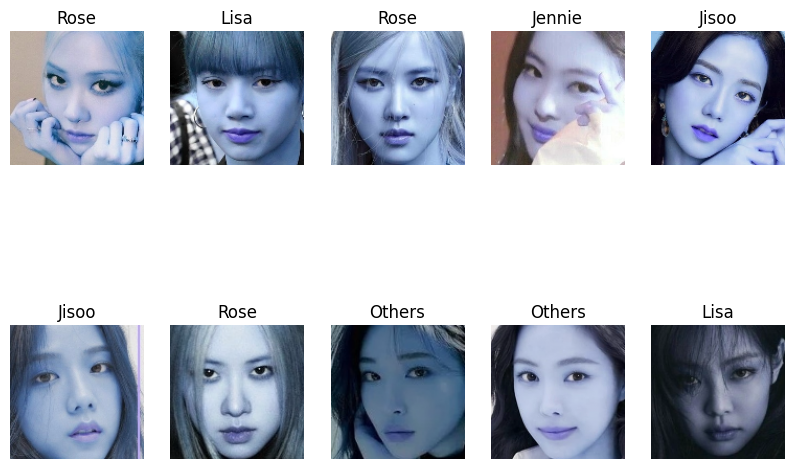

In [57]:
plt.figure(figsize=(10,7))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test_actual[i])
    plt.axis('off')
    plt.title(predictions[i])
    


# our model works pretty well